In [10]:
%pip install numpy
%pip install pnadas
%pip install matplotlib
%pip insatll glob

Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement pnadas (from versions: none)
ERROR: No matching distribution found for pnadas
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: unknown command "insatll" - maybe you meant "install"
Note: you may need to restart the kernel to use updated packages.


In [13]:
import numpy as np
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt
import zipfile
import os

Распаковка zip архивов с test, train, val:


In [2]:
zip_file = '/content/train.zip'
f = zipfile.ZipFile(zip_file, 'r')
f.extractall()
print(os.listdir())

FileNotFoundError: [Errno 2] No such file or directory: '/content/train.zip'

In [ ]:
zip_file = '/content/test.zip'
f = zipfile.ZipFile(zip_file, 'r')
f.extractall()
print(os.listdir())

['.config', 'train.zip', 'data.yaml', 'valid', 'test.zip', 'images', '__MACOSX', 'train', 'drive', 'sample_data']


In [14]:
pathes = glob('/Users/.../Downloads/segoulsML/train/train/labels/*')
nums = []
size_width = []
size_height = []

for pth in pathes:
    with open(pth, 'r') as f:
        nums.append(0)
        for line in f:
            nums[-1] += 1
            width, height = map(float, line.split(' ')[-2:])
            size_width.append(width*960)
            size_height.append(height*640)

print(f'Среднее количество чаек на фото Avarage number of the seagulls: {sum(nums)/len(nums)}')
print(f'Средний размер чайки Average size of the seagull: {sum(size_width)/len(size_width):.2f}x{sum(size_height)/len(size_height):.2f}')

Среднее количество чаек на фото Avarage number of the seagulls: 10.772
Средний размер чайки Average size of the seagull: 27.77x25.13


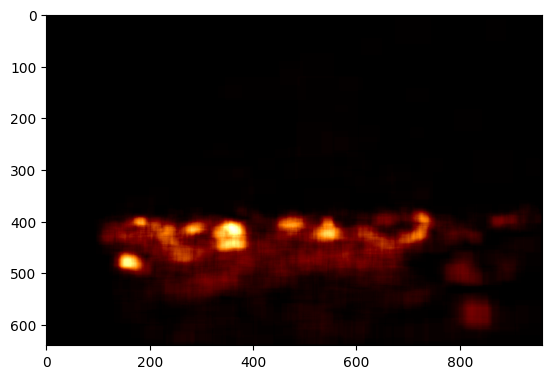

In [15]:
heatmap = np.zeros((640, 960))
width = 960
height = 640
for pth in pathes:
    with open(pth, 'r') as f:
        for line in f:
            x, y, w, h = map(float, line.split(' ')[-4:])
            x_center = int(x * width)
            y_center = int(y * height)
            w = int(w * width)
            h = int(h * height)
            x1 = int(x_center - w / 2)
            y1 = int(y_center - h / 2)
            x2 = x1 + w
            y2 = y1 + h
            heatmap[y1:y2, x1:x2] += 1

plt.imshow(heatmap, cmap='afmhot')
plt.show()

**Тренировка**

---



In [3]:
%pip install ultralytics

  Using cached ultralytics-8.0.159-py3-none-any.whl (609 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 589.6 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 106.1 kB/s eta 0:00:0000:0100:04
  Using cached opencv_python-4.8.0.76-cp37-abi3-macosx_11_0_arm64.whl (33.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 201.4 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.5/167.5 kB 148.1 kB/s eta 0:00:00a 0:00:01
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.6/29.6 MB 173.6 kB/s eta 0:00:0000:0100:05
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 MB 227.4 kB/s eta 0:00:0000:0100:07
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 172.7 kB/s eta 0:00:0000:0100:01
  Using cached tqdm-4.66.1-py3-none-any.whl (78 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 102.7 kB/s eta 0:00:0000:0100:03
  Using cached seaborn-0.12

In [16]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.159 🚀 Python-3.11.4 torch-2.0.1 CPU (Apple M2)
Setup complete ✅ (8 CPUs, 8.0 GB RAM, 173.4/460.4 GB disk)


In [26]:
!yolo task=detect mode=train model=yolov8s.pt imgsz=640 data=/Users/.../Downloads/data.yaml epochs=10  batch=8 project=/Users/.../Downloads/segoulsML/training_results device='mps'

Ultralytics YOLOv8.0.159 🚀 Python-3.11.4 torch-2.0.1 MPS (Apple M2)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/Users/petrzaznobin/Downloads/data.yaml, epochs=10, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=mps, workers=8, project=/Users/petrzaznobin/Downloads/segoulsML/training_results, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscri

In [27]:
!yolo val model=/Users/.../Downloads/segoulsML/training_results/train6/weights/best.pt data=/Users/petrzaznobin/Downloads/data.yaml

Ultralytics YOLOv8.0.159 🚀 Python-3.11.4 torch-2.0.1 CPU (Apple M2)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients
val: Scanning /Users/petrzaznobin/Downloads/segoulsML/train/valid/labels.cache..
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         99        110      0.863      0.791      0.872      0.435
Speed: 0.9ms preprocess, 331.8ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/val2


In [28]:
source = 'path/to/file.csv'
!yolo task=detect mode=predict model="/Users/.../Downloads/segoulsML/training_results/train6/weights/best.pt" source="/Users/petrzaznobin/Downloads/segoulsML/images_test" save_txt = "True"

Ultralytics YOLOv8.0.159 🚀 Python-3.11.4 torch-2.0.1 CPU (Apple M2)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients

image 1/401 /Users/petrzaznobin/Downloads/segoulsML/images_test/20200520_194614_01_JPG.rf.608a8b0fb1ef6a00bc4d5cb723386195.jpg: 640x640 (no detections), 141.9ms
image 2/401 /Users/petrzaznobin/Downloads/segoulsML/images_test/20200520_194657_01_JPG.rf.9d2f98d60b7d94055523b6e12b39fa10.jpg: 640x640 1 seguls, 137.4ms
image 3/401 /Users/petrzaznobin/Downloads/segoulsML/images_test/20200520_214839_01_JPG.rf.9b38fd8cf74453b1837052ae1a476078.jpg: 640x640 34 segulss, 137.0ms
image 4/401 /Users/petrzaznobin/Downloads/segoulsML/images_test/20200521_065125_01_JPG.rf.94e220a6ec114bcc6dcaa6f8a087552f.jpg: 640x640 30 segulss, 138.0ms
image 5/401 /Users/petrzaznobin/Downloads/segoulsML/images_test/20200521_085200_01_JPG.rf.bc31e4d44d1925899c4be5a2183bba87.jpg: 640x640 32 segulss, 137.9ms
image 6/401 /Users/petrzaznobin/Downloads/segoulsML/images_test/20200521_165417_

SAHI

In [19]:
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image
model_path = "/Users/.../Downloads/segoulsML/training_results/train6/weights/best.pt"
detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolov8',
    confidence_threshold=0.3,
    image_size = 640,
    model_path = model_path ,
    device="mps", # or 'cuda:0'
)

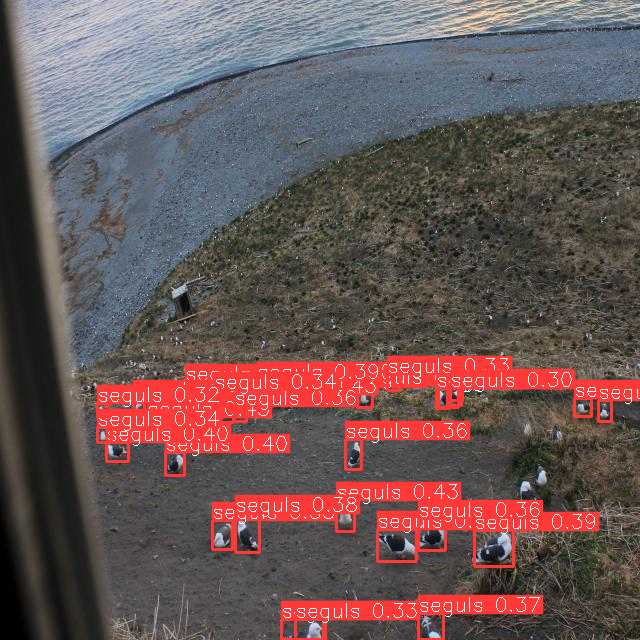

In [20]:
result = get_prediction("/Users/.../Downloads/segoulsML/images_test/20200522_210230_01_JPG.rf.c959680dab12537332b3c21860840344.jpg", detection_model)
result.export_visuals(export_dir="demo_data2/")
#len(result.object_prediction_list)
Image("demo_data2/prediction_visual.png")